# Insper - Modelagem e Simulação do Mundo Físico  

## Projeto 3 - Lançamento Oblíquo de uma Bola de Basquete com Rotação
---
---

In [3]:
# Importa bibliotecas necessárias
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
from matplotlib import animation

---
---
# Modelos, validação e gráficos

---
---
## Modelo desconsiderando a rotação

---
### Código do modelo inicial com equações:

In [71]:
def modelo(lista, t):
    x, y, vx, vy = lista[0], lista[1], lista[2], lista[3]
    V = math.sqrt(vx ** 2 + vy ** 2)
     
    # Equações de posição
    dxdt = vx
    dydt = vy
  
    # Equações de velocidade
    dvxdt = (-1/m) * ((1/2) * pa * A * cd * V * vx)
    dvydt = ((1/m) * (pa * V * g - (1/2) * A * cd * V * vy * pa)) - g
    
    if y < 0 and dvydt < 0:
        dvydt = 0
        dydt = 0
    
    lista_return = [dxdt, dydt, dvxdt, dvydt]
    return lista_return

---
### Definindo parâmetros iníciais e rodando odeint:

In [88]:
# Parâmetros
dt = 3 * 10 ** -3
lista_tempo = np.arange(0, 10, dt)

# A massa, o A, a distancia e o raio são medidas minhas que provavelmente estão erradas
raio = 0.11
m = 0.4
A = 4 * math.pi * raio ** 2
pa = 0.058225 # Densidade do ar
cd = 0.47 # Coeficiente de arrasto de uma esfera
distancia = 17.5 # Distância entre a trave e o escanteio
g = 9.81

# Condições iniciais
x0 = 0
vx0 = 5
y0 = 0
vy0 = 5
ci = [x0, y0, vx0, vy0]

odeint_modelo = odeint(modelo, ci, lista_tempo)
x_odeint = odeint_modelo[:,0]
y_odeint = odeint_modelo[:,1]
vx_odeint = odeint_modelo[:,2]
vy_odeint = odeint_modelo[:,3]

C:\Users\fefea\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


---
### Gráfico inicial:

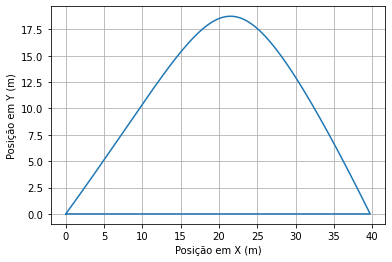

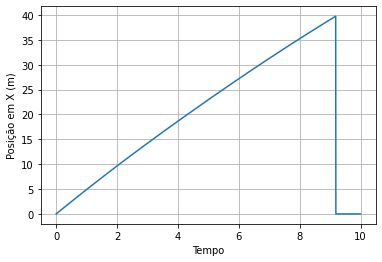

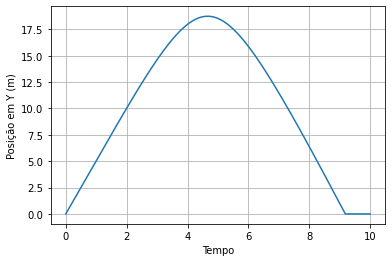

In [89]:
plt.plot(x_odeint, y_odeint)
plt.xlabel("Posição em X (m)")
plt.ylabel("Posição em Y (m)")
plt.grid(True)
plt.show()

plt.plot(lista_tempo, x_odeint)
plt.xlabel("Tempo")
plt.ylabel("Posição em X (m)")
plt.grid(True)
plt.show()

plt.plot(lista_tempo, y_odeint)
plt.xlabel("Tempo")
plt.ylabel("Posição em Y (m)")
plt.grid(True)
plt.show()

---
---
## Modelo considerando a rotação

---
### Código do modelo considerando a rotação:

In [ ]:
def modelo2(lista, t):
    x, y, z, vx, vy, vz, r = lista[0], lista[1], lista[2], lista[3], lista[4], lista[5], lista[6]
    V = math.sqrt(vx ** 2 + vy ** 2)
     
    # Equações de posição
    dxdt = vx
    dydt = vy
    dzdt = vz
    
    # Equações de velocidade
    dvxdt = 
    dvydt = 
    dvzdt = 
    
    # Equação da rotação
    drdt = 
    
    lista_return = [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt, drdt]
    return lista_return

---
### Definindo parâmetros iníciais e rodando odeint:

In [ ]:
# Parâmetros
dt = 3 * 10 ** -3
lista_tempo = np.arange(0, 5, dt)

# A massa, o A, a distancia e o raio são medidas minhas que provavelmente estão erradas
raio = 0.11
m = 0.4
A = 4 * math.pi * raio ** 3
pa = 1.225 # Densidade do ar
cd = 0.47 # Coeficiente de arrasto de uma esfera
distancia = 17.5 # Distância entre a trave e o escanteio
g = 9.81

# Condições iniciais
x0 = 0
vx0 = 5
y0 = 0
vy0 = 5
z0 = 0
vz0 = 0
r0 = 20
ci = [x0, y0, z0, vx0, vy0, vz0, r0]

odeint_modelo = odeint(modelo2, ci, lista_tempo)
x_odeint = odeint_modelo[:,0]
y_odeint = odeint_modelo[:,1]
z_odeint = odeint_modelo[:,2]
vx_odeint = odeint_modelo[:,3]
vy_odeint = odeint_modelo[:,4]
vz_odeint = odeint_modelo[:,5]
r_odeint = odeint_modelo[:,6]

---
### Gráfico inicial para a validação:

In [ ]:
plt.plot(x_odeint, y_odeint)
plt.xlabel("Posição em X (m)")
plt.ylabel("Posição em Y (m)")
plt.grid(True)
plt.show()

plt.plot(x_odeint, z_odeint)
plt.xlabel("Posição em X (m)")
plt.grid(True)
plt.show()

plt.plot(z_odeint, y_odeint)
plt.xlabel("Posição em Z (m)")
plt.ylabel("Posição em Y (m)")
plt.grid(True)
plt.show()

---
---
## Início de gráficos conclusivos
---

### Alterando a rotação inicial da bola:

In [ ]:
lista_rotacoes = np.arange(0, 1000, 50) / 30 * math.pi
lista_odeint = []
tempo_minimo = {}

for rotacao in lista_rotacoes:
    ci = [x0, y0, z0, vx0, vy0, vz0, rotacao]
    odeint_rotacao = odeint(modelo2, ci, lista_tempo)
    lista_odeint.append(odeint_rotacao)
    lista_odeint_x = list(odeint_rotacao[:,0])
    lista_odeint_z = list(odeint_rotacao[:,2])
    for i in range(len(lista_odeint_x)):
        # Se for maior que a distância salvar no dicionario
        if lista_odeint_x[i] > distancia and lista_odeint_z[i] <= 0 - raio:
            tempo_minimo[rotacao] = lista_tempo[i]
            break
        elif lista_odeint_z[i] <= 0 - raio:
            tempo_minimo[rotacao] = -1
            break

rotacao_minima = 0
for rot, tempo in tempo_minimo.items():
    if rot < rotacao_minima:
        rotacao_minima = rot
        menor_tempo = tempo

---
### Gráfico conclusivo da rotação pelo tempo mínimo para entrar no gol:

In [ ]:
chaves = list(tempo_minimo.keys())
valores = list(tempo_minimo.values())

plt.plot(chaves, valores, 'ro')
plt.xlabel("Rotação (rad/s)")
plt.ylabel("Tempo mínimo (s)")
plt.grid(True)
plt.show()

--- 
### Gráfico em 3d com a rotação inicial minima:

In [ ]:
# Odeint da rotação certa
ci = [x0, y0, z0, vx0, vy0, vz0, 500] # Não é 500, valor arbitrario pra gerar o gráfico
odeint_rotacao = odeint(modelo2, ci, lista_tempo)
x_odeint = odeint_rotacao[:,0]
y_odeint = odeint_rotacao[:,1]
z_odeint = odeint_rotacao[:,2]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x_odeint, y_odeint, z_odeint, label='Curva da bola')
ax.legend()

---
### Gráfico animado:

In [ ]:
get_ipython().magic('matplotlib qt5')
%matplotlib qt5

# Odeint da rotação certa
ci = [x0, y0, z0, vx0, vy0, vz0, rotacao_minima] 
odeint_rotacao = odeint(modelo2, ci, lista_tempo)
x_odeint = odeint_rotacao[:,0]
y_odeint = odeint_rotacao[:,1]
z_odeint = odeint_rotacao[:,2]


def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    return line

dataSet = np.array([x_odeint, y_odeint, z_odeint])
numDataPoints = len(z_odeint)
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure()
ax = Axes3D(fig)
 
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('time')
ax.set_title('Trajectory of electron for E vector along [120]')
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=50, blit=False)
#line_ani.save(r'AnimationNew.mp4')
 
 
plt.show()